## WeatherPy

**Note**

- Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import API key
from api_keys import weather_api_key

#import citipy to determine city based on latitude and longitude
from citipy import citipy

#set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
#create lists for holding lat_lngs and cities
lat_lngs = []
cities = []

#create set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
#set starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#create lists for holding city data
new_cities = []
countries = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
dates = []
lats = []
lngs = []

#print beginning of retrieval
print("---------------------------------------")
print("Beginning Data Retrieval")
print("---------------------------------------")

#create counters
counter = 0
group = 1

#loop through all the cities in our list
for city in cities:

    #try an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        response = requests.get(url + "&q=" + city).json()
                
        #parse out each piece of data we're looking for and append to lists
        max_temps.append(response["main"]["temp_max"])
        humidities.append(response["main"]["humidity"])
        cloudinesses.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        wind_speeds.append(response["wind"]["speed"])
        dates.append(response["dt"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        
        #create groups of 50, append cities to list, update counter value
        if counter > 49:
            counter = 1
            group += 1
            new_cities.append(city)
        else:
            counter += 1
            new_cities.append(city)
        
        #print as records are processing
        print(f"Processing Record {counter} of Set {group} | {city}")
    
    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping to next...")

#indicate that data loading is complete 
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")

---------------------------------------
Beginning Data Retrieval
---------------------------------------
Processing Record 1 of Set 1 | hobart
City not found. Skipping to next...
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | puerto leguizamo
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | poya
Processing Record 7 of Set 1 | rikitea
City not found. Skipping to next...
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | ketchikan
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | birjand
Processing Record 15 of Set 1 | nuevo imperial
Processing Record 16 of Set 1 | rocky mountain house
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | khatanga
City not found. Skipping to next...
Processing Record 19 of Set 1 | atuona
P

Processing Record 28 of Set 4 | touros
Processing Record 29 of Set 4 | chapais
Processing Record 30 of Set 4 | saldanha
City not found. Skipping to next...
City not found. Skipping to next...
Processing Record 31 of Set 4 | pevek
Processing Record 32 of Set 4 | antofagasta
Processing Record 33 of Set 4 | namatanai
Processing Record 34 of Set 4 | biak
Processing Record 35 of Set 4 | mayo
Processing Record 36 of Set 4 | zuenoula
Processing Record 37 of Set 4 | turbat
Processing Record 38 of Set 4 | cockburn town
Processing Record 39 of Set 4 | tautira
Processing Record 40 of Set 4 | provideniya
Processing Record 41 of Set 4 | synya
Processing Record 42 of Set 4 | chambas
Processing Record 43 of Set 4 | bodden town
Processing Record 44 of Set 4 | grindavik
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | haines junction
Processing Record 47 of Set 4 | latung
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | griffith
Processing Record 50 of S

Processing Record 10 of Set 8 | koscierzyna
Processing Record 11 of Set 8 | domodossola
Processing Record 12 of Set 8 | oudtshoorn
Processing Record 13 of Set 8 | suntar
Processing Record 14 of Set 8 | ardakan
Processing Record 15 of Set 8 | westport
Processing Record 16 of Set 8 | alberton
Processing Record 17 of Set 8 | finnsnes
Processing Record 18 of Set 8 | aksu
Processing Record 19 of Set 8 | arman
Processing Record 20 of Set 8 | lazo
Processing Record 21 of Set 8 | tungor
Processing Record 22 of Set 8 | vallam
Processing Record 23 of Set 8 | cabra
Processing Record 24 of Set 8 | zhanaozen
Processing Record 25 of Set 8 | wajir
Processing Record 26 of Set 8 | erenhot
Processing Record 27 of Set 8 | bowen
Processing Record 28 of Set 8 | atar
Processing Record 29 of Set 8 | churapcha
Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | inongo
Processing Record 32 of Set 8 | naze
Processing Record 33 of Set 8 | bambanglipuro
Processing Record 34 of Set 8 | bel

Processing Record 46 of Set 11 | bismarck
Processing Record 47 of Set 11 | tanggul
Processing Record 48 of Set 11 | arica
Processing Record 49 of Set 11 | jiangyou
Processing Record 50 of Set 11 | xai-xai
---------------------------------------
Data Retrieval Complete
---------------------------------------


### Convert Raw Data to DataFrame
- Export the city data into a .csv.
- Display the DataFrame

In [4]:
#convert array of JSONs into DataFrame
df_columns = {"City" : new_cities, "Country" : countries, "Latitude" : lats, "Longitude" : lngs, 
              "Max Temperature" : max_temps, "Humidity": humidities, "Cloudiness" : cloudinesses, 
              "Wind Speed" : wind_speeds, "Date" : dates}

In [5]:
#show record count and display the City DataFrame
city_df = pd.DataFrame.from_dict(df_columns)
print(city_df["City"].count())
city_df.head()

550


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,hobart,AU,-42.88,147.33,46.40,70,75,6.93,1603654051
1,albany,US,42.60,-73.97,48.99,43,0,5.39,1603654347
2,puerto leguizamo,CO,-0.19,-74.78,92.91,49,99,1.23,1603654348
3,mar del plata,AR,-38.00,-57.56,63.00,100,90,3.36,1603654271
4,yellowknife,CA,62.46,-114.35,28.40,74,75,8.05,1603654273


In [6]:
#export to csv
city_df.to_csv(path_or_buf = "output_files/city_data.csv")

### Inspect the data and remove the cities where the humidity > 100%.

- Skip this step if there are no cities that have humidity > 100%.

In [7]:
#check if max humidity is over 100
city_df.max()

City                 zyryanka
Country                    ZM
Latitude                78.22
Longitude              179.32
Max Temperature           104
Humidity                  100
Cloudiness                100
Wind Speed              40.26
Date               1603654521
dtype: object

### Latitude vs. Temperature Plot

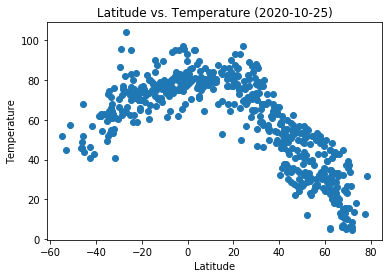

In [8]:
#build scatter plot for latitude vs. temperature
lat_temp = plt.scatter(city_df["Latitude"], city_df["Max Temperature"])

#get today's date
from datetime import date
today = date.today() 

#incorporate other graph properties
plt.title(f"Latitude vs. Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

#save the figure as png
plt.savefig("output_files/lat_temp.png")

#show plot
plt.show()

### Latitude vs. Humidity Plot

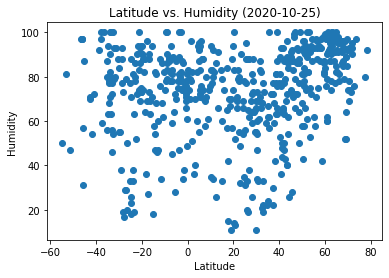

In [9]:
#build scatter plot for latitude vs. humidity
lat_humid = plt.scatter(city_df["Latitude"], city_df["Humidity"])

#get today's date
from datetime import date
today = date.today() 

#incorporate other graph properties
plt.title(f"Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#save the figure as png
plt.savefig("output_files/lat_humid.png")

#show plot
plt.show()

### Latitude vs. Cloudiness Plot

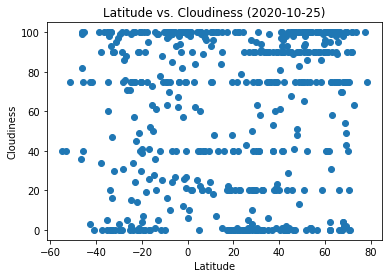

In [10]:
#build scatter plot for latitude vs. cloudiness
lat_cloud = plt.scatter(city_df["Latitude"], city_df["Cloudiness"])

#get today's date
from datetime import date
today = date.today() 

#incorporate other graph properties
plt.title(f"Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#save the figure as png
plt.savefig("output_files/lat_cloudy.png")

#show plot
plt.show()

### Latitude vs. Wind Speed Plot

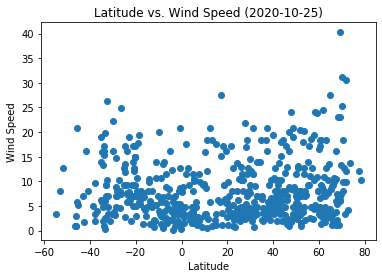

In [11]:
#build scatter plot for latitude vs. wind speed
lat_wind = plt.scatter(city_df["Latitude"], city_df["Wind Speed"])

#get today's date
from datetime import date
today = date.today() 

#incorporate other graph properties
plt.title(f"Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#save the figure as png
plt.savefig("output_files/lat_wind.png")

#show plot
plt.show()

### Linear Regression

In [28]:
# Create a function to create Linear Regression plots
def linreg(x_values, y_values):  
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [25]:
# Create Northern and Southern Hemisphere DataFrames
n_hem = city_df.loc[(city_df["Latitude"] > 0)]
s_hem = city_df.loc[(city_df["Latitude"] < 0)]

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
1,albany,US,42.60,-73.97,48.99,43,0,5.39,1603654347
4,yellowknife,CA,62.46,-114.35,28.40,74,75,8.05,1603654273
8,ketchikan,US,55.34,-131.65,37.40,93,90,13.87,1603654349
10,hilo,US,19.73,-155.09,82.40,74,40,5.82,1603654239
12,jamestown,US,42.10,-79.24,46.00,63,90,10.29,1603654346
...,...,...,...,...,...,...,...,...,...
540,mecca,SA,21.43,39.83,78.21,71,0,2.95,1603654510
541,sitrah,BH,26.15,50.62,82.40,65,5,4.70,1603654519
542,deputatskiy,RU,69.30,139.90,5.32,89,2,6.22,1603654519
545,bismarck,US,46.81,-100.78,21.99,79,75,16.11,1603654520


### Max Temp vs. Latitude Linear Regression

The r-value is: -0.8833601185291405


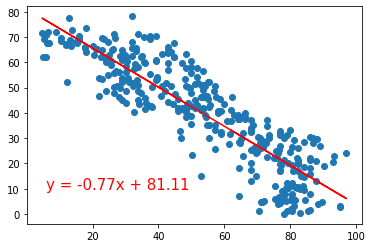

In [29]:
# Linear regression on Northern Hemisphere
linreg(n_hem["Max Temperature"], n_hem["Latitude"])

The r-value is: 0.6917945875679732


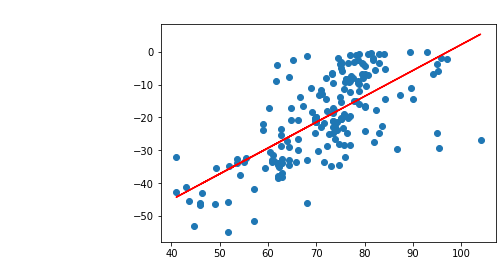

In [30]:
# Linear regression on Southern Hemisphere
linreg(s_hem["Max Temperature"], s_hem["Latitude"])

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.33262443622985427


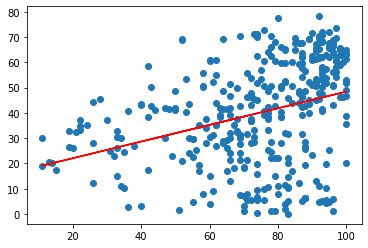

In [32]:
# Northern Hemisphere
linreg(n_hem["Humidity"], n_hem["Latitude"])

The r-value is: 0.025088431388021675


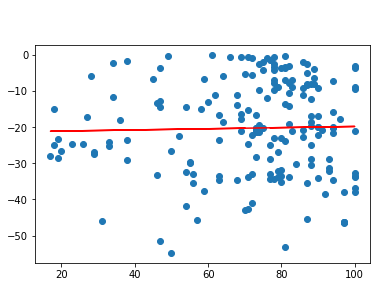

In [33]:
# Southern Hemisphere
linreg(s_hem["Humidity"], s_hem["Latitude"])

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18999223701628837


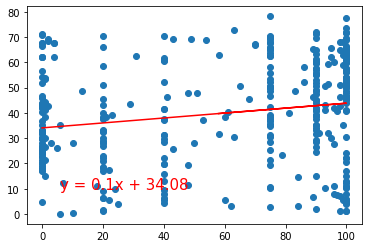

In [34]:
# Northern Hemisphere
linreg(n_hem["Cloudiness"], n_hem["Latitude"])

The r-value is: 0.14446201616167112


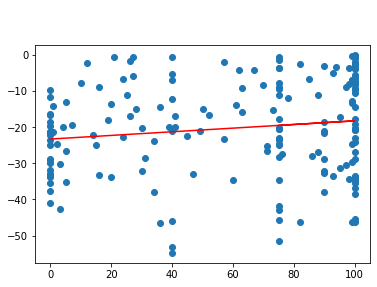

In [35]:
# Southern Hemisphere
linreg(s_hem["Cloudiness"], s_hem["Latitude"])

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.18627777183619496


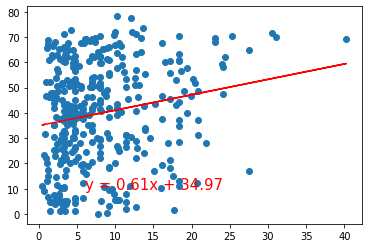

In [36]:
# Northern Hemisphere
linreg(n_hem["Wind Speed"], n_hem["Latitude"])

The r-value is: -0.17530668732715243


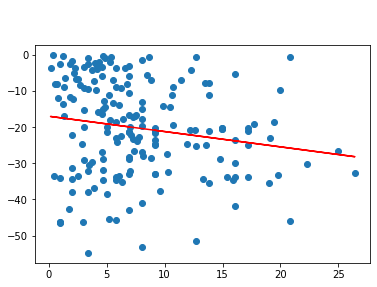

In [37]:
# Southern Hemisphere
linreg(s_hem["Wind Speed"], s_hem["Latitude"])